In [36]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_test = y_test.reshape(-1,)

In [16]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

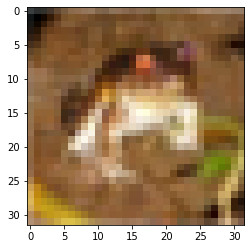

In [21]:
plt.imshow(X_train[0])

In [20]:
print(y_train[0])

6


6


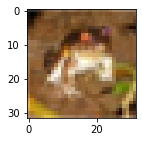

9


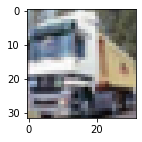

9


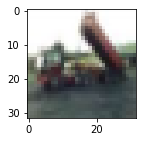

4


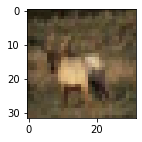

1


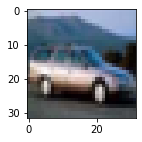

1


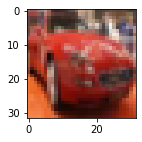

2


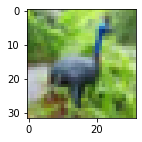

7


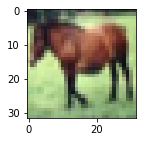

8


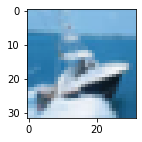

3


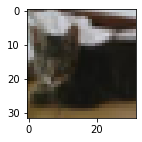

4


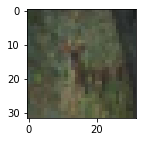

7


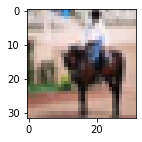

7


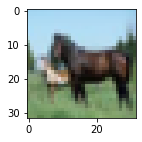

2


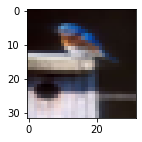

9


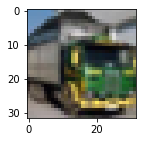

9


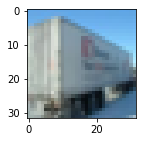

9


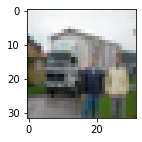

3


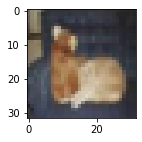

2


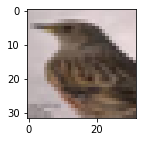

6


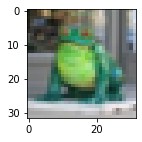

In [25]:
for i in range(20):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[i])
    print(y_train[i])
    plt.show()

In [26]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [29]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [30]:
X_train = X_train/255.0

In [31]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [32]:
X_test = X_test/255.0

In [33]:
X_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [34]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.8119 - accuracy: 0.3570
Epoch 2/5
1563/1563 [==============================] - 68s 43ms/step - loss: 1.6242 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 68s 44ms/step - loss: 1.5414 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4825 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 67s 43ms/step - loss: 1.4331 - accuracy: 0.4962


In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(50, activation='leaky_relu'),
    keras.layers.Dense(35, activation='leaky_relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 2s 936us/step - loss: 1.9366 - accuracy: 0.3034
Epoch 2/100
1563/1563 [==============================] - 1s 903us/step - loss: 1.7626 - accuracy: 0.3761
Epoch 3/100
1563/1563 [==============================] - 1s 915us/step - loss: 1.6929 - accuracy: 0.40120s - loss: 1
Epoch 4/100
1563/1563 [==============================] - 1s 904us/step - loss: 1.6443 - accuracy: 0.4179
Epoch 5/100
1563/1563 [==============================] - 1s 914us/step - loss: 1.6081 - accuracy: 0.4332
Epoch 6/100
1563/1563 [==============================] - 1s 906us/step - loss: 1.5801 - accuracy: 0.4449
Epoch 7/100
1563/1563 [==============================] - 2s 960us/step - loss: 1.5537 - accuracy: 0.4530
Epoch 8/100
1563/1563 [==============================] - 1s 866us/step - loss: 1.5327 - accuracy: 0.4585
Epoch 9/100
1563/1563 [==============================] - 1s 915us/step - loss: 1.5135 - accuracy: 0.4656
Epoch 10/100
1563/1563 [===================

1563/1563 [==============================] - 1s 883us/step - loss: 1.1528 - accuracy: 0.5894
Epoch 78/100
1563/1563 [==============================] - 1s 826us/step - loss: 1.1494 - accuracy: 0.5913
Epoch 79/100
1563/1563 [==============================] - 1s 805us/step - loss: 1.1483 - accuracy: 0.5916
Epoch 80/100
1563/1563 [==============================] - 1s 768us/step - loss: 1.1457 - accuracy: 0.5936
Epoch 81/100
1563/1563 [==============================] - 1s 899us/step - loss: 1.1456 - accuracy: 0.5948
Epoch 82/100
1563/1563 [==============================] - 1s 913us/step - loss: 1.1412 - accuracy: 0.5945
Epoch 83/100
1563/1563 [==============================] - 1s 863us/step - loss: 1.1399 - accuracy: 0.5967
Epoch 84/100
1563/1563 [==============================] - 1s 905us/step - loss: 1.1393 - accuracy: 0.5958
Epoch 85/100
1563/1563 [==============================] - 1s 918us/step - loss: 1.1338 - accuracy: 0.5960
Epoch 86/100
1563/1563 [==============================] - 1

In [51]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2000, activation='leaky_relu'),
    keras.layers.Dense(1000, activation='leaky_relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.8301 - accuracy: 0.3490
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6513 - accuracy: 0.4171
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5712 - accuracy: 0.4472
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5175 - accuracy: 0.4666
Epoch 5/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4740 - accuracy: 0.4830
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4324 - accuracy: 0.4977
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4021 - accuracy: 0.5077
Epoch 8/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.3692 - accuracy: 0.5188
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.3395 - accuracy: 0.5294
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [56]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.2),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
#     model.add(Flatten())
# model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
# model.add(Dropout(0.5))
    
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    
    layers.Dropout(0.5),
    
    layers.Dense(10, activation='softmax')
])

cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn2.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4979 - accuracy: 0.4545
Epoch 2/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.1508 - accuracy: 0.5941
Epoch 3/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0249 - accuracy: 0.6416
Epoch 4/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9350 - accuracy: 0.6737
Epoch 5/15
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8768 - accuracy: 0.6932
Epoch 6/15
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8229 - accuracy: 0.7128
Epoch 7/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7789 - accuracy: 0.7296
Epoch 8/15
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7412 - accuracy: 0.74020s -
Epoch 9/15
 788/1563 [==============>...............] - ETA: 19s - loss: 0.6974 - accuracy: 0.7553

KeyboardInterrupt: 

In [57]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4692 - accuracy: 0.4698
Epoch 2/30
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1071 - accuracy: 0.6120
Epoch 3/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9742 - accuracy: 0.6607
Epoch 4/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8894 - accuracy: 0.6911
Epoch 5/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8203 - accuracy: 0.7165
Epoch 6/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7648 - accuracy: 0.7327
Epoch 7/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7210 - accuracy: 0.7489
Epoch 8/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6761 - accuracy: 0.7635
Epoch 9/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6375 - accuracy: 0.7770
Epoch 10/30
1563/1563 [==============================] - 34s 22m

In [61]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.5072 - accuracy: 0.4865


[1.5071635246276855, 0.48649999499320984]

In [62]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.8247 - accuracy: 0.6709


[1.8246501684188843, 0.6708999872207642]

In [63]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 1.4501 - accuracy: 0.4824


[1.4501140117645264, 0.48240000009536743]

In [64]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.3843 - accuracy: 0.5083


[1.384307622909546, 0.5083000063896179]